---------
# Period Select
-----------------------

## 계획
-----
1. `아파트의 가격`에 영향을 미치는 요소 중에 `시계열 데이터`를 배제하기 위해 
기간을 선정하는 것을 목적으로 함
2. 시계열 데이터를 제거하고자 하는 목적은 특정 기간 내 아파트에 대해서 `동일 시간대`로 설정하기 위함
3. 2016년에서 2020년 1월까지의 데이터를 기준으로 `3개월`을 선정
4. 주요 부동산 정책, 아파트 실거래가 지수, 아파트 거래 지수, 금리, 물가를 고려하여 가장 `변동이 적은 기간`을 선정

## Import

In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터 불러오기
- ApartRealTradingIndex : 아파트 실거래가 지수
- ApartTradingIndex : 아파트 거래 지수
- InterestRate : 금리
- policy : 정책
- PriceIndex : 물가

In [14]:
ApartRealTradingIndex=pd.read_csv("../Data/collectData/K_20200414_ApartRealTradingIndex.csv")
ApartTradingIndex=pd.read_csv("../Data/collectData/K_20200414_ApartTradingIndex.csv")
InterestRate=pd.read_csv("../Data/collectData/K_20200414_InterestRate.csv")
policy=policy=pd.read_csv("../Data/collectData/K_20200414_policy.csv",encoding='CP949')
PriceIndex=pd.read_csv("../Data/collectData/K_20200414_PriceIndex.csv")
ApartRealTradingIndex.head()

,date,data
0,Jan-16,85.3
1,Feb-16,85.5
2,Mar-16,85.6
3,Apr-16,86.0
4,May-16,86.5


In [36]:
ApartTradingIndex.head()

,date,data
0,Jan-16,93.3
1,Feb-16,93.3
2,Mar-16,93.3
3,Apr-16,93.4
4,May-16,93.6


In [37]:
InterestRate.head()

,date,data
0,Jan-16,1.61
1,Feb-16,1.54
2,Mar-16,1.55
3,Apr-16,1.55
4,May-16,1.52


In [38]:
PriceIndex.head()

,date,data
0,Jan-16,100.39
1,Feb-16,100.82
2,Mar-16,100.56
3,Apr-16,100.75
4,May-16,100.81


## 데이터 가공
>4개의 컬럼이 date와 data의 형태로 구조가 동일하므로 merge를 통해 하나의 데이터프레임으로 만듬

In [39]:
ApartRealTradingIndex.rename(columns={"data":"ARTI"},inplace=True)
ApartTradingIndex.rename(columns={"data":"ATI"},inplace=True)
InterestRate.rename(columns={"data":"IR"},inplace=True)
PriceIndex.rename(columns={"data":"PI"},inplace=True)

In [40]:
Apart = pd.merge(ApartRealTradingIndex,ApartTradingIndex, on='date')
Apart = pd.merge(Apart,InterestRate, on='date')
Apart = pd.merge(Apart, PriceIndex, on='date')
Apart.head()

,date,ARTI,ATI,IR,PI
0,Jan-16,85.3,93.3,1.61,100.39
1,Feb-16,85.5,93.3,1.54,100.82
2,Mar-16,85.6,93.3,1.55,100.56
3,Apr-16,86.0,93.4,1.55,100.75
4,May-16,86.5,93.6,1.52,100.81


In [41]:
for i in range(0,len(Apart)):
    Apart.iloc[i,0] = Apart.iloc[i,0][4:] + "-" + Apart.iloc[i,0][:3]
Apart.head()

,date,ARTI,ATI,IR,PI
0,16-Jan,85.3,93.3,1.61,100.39
1,16-Feb,85.5,93.3,1.54,100.82
2,16-Mar,85.6,93.3,1.55,100.56
3,16-Apr,86.0,93.4,1.55,100.75
4,16-May,86.5,93.6,1.52,100.81


In [42]:
for i in range(0,len(Apart)):
    Apart['date'][i]=Apart['date'][i][:3]+Apart['date'][i][3:].replace('Jan','1')

for i in range(0,len(Apart)):
    Apart['date'][i]=Apart['date'][i][:3]+Apart['date'][i][3:].replace('Feb','2')

for i in range(0,len(Apart)):
    Apart['date'][i]=Apart['date'][i][:3]+Apart['date'][i][3:].replace('Mar','3')

for i in range(0,len(Apart)):
    Apart['date'][i]=Apart['date'][i][:3]+Apart['date'][i][3:].replace('Apr','4')

for i in range(0,len(Apart)):
    Apart['date'][i]=Apart['date'][i][:3]+Apart['date'][i][3:].replace('May','5')

for i in range(0,len(Apart)):
    Apart['date'][i]=Apart['date'][i][:3]+Apart['date'][i][3:].replace('Jun','6')

for i in range(0,len(Apart)):
    Apart['date'][i]=Apart['date'][i][:3]+Apart['date'][i][3:].replace('Jul','7')

for i in range(0,len(Apart)):
    Apart['date'][i]=Apart['date'][i][:3]+Apart['date'][i][3:].replace('Aug','8')

for i in range(0,len(Apart)):
    Apart['date'][i]=Apart['date'][i][:3]+Apart['date'][i][3:].replace('Sep','9')

for i in range(0,len(Apart)):
    Apart['date'][i]=Apart['date'][i][:3]+Apart['date'][i][3:].replace('Oct','10')

for i in range(0,len(Apart)):
    Apart['date'][i]=Apart['date'][i][:3]+Apart['date'][i][3:].replace('Nov','11')

for i in range(0,len(Apart)):
    Apart['date'][i]=Apart['date'][i][:3]+Apart['date'][i][3:].replace('Dec','12')


Apart.head()

,date,ARTI,ATI,IR,PI
0,16-1,85.3,93.3,1.61,100.39
1,16-2,85.5,93.3,1.54,100.82
2,16-3,85.6,93.3,1.55,100.56
3,16-4,86.0,93.4,1.55,100.75
4,16-5,86.5,93.6,1.52,100.81


In [43]:
Apart['date']='20'+Apart['date']

In [44]:
Apart['date'] = pd.to_datetime(Apart['date'],format='%Y-%m')

## 데이터 시각화

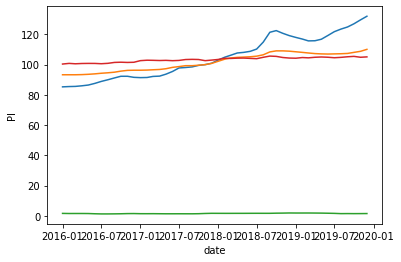

In [45]:
sns.lineplot(x='date',y='ARTI',data=Apart)
sns.lineplot(x='date',y='ATI',data=Apart)
sns.lineplot(x='date',y='IR',data=Apart)
sns.lineplot(x='date',y='PI',data=Apart)

>차이를 명확히 구분하기 어려운 관계로 numpy의 diff사용

In [46]:
Apart=Apart.set_index('date')

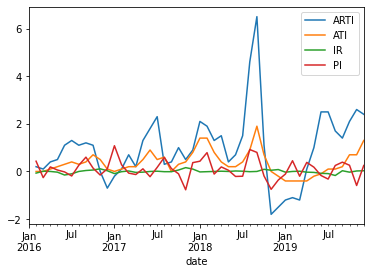

In [47]:
diff_1 = Apart.diff(periods=1)
diff_1.plot()
plt.show()

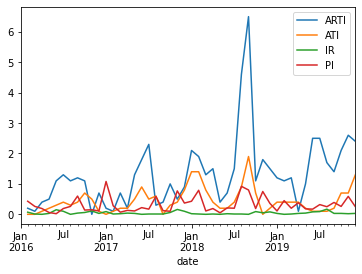

In [48]:
ad_diff_1=abs(diff_1)
ad_diff_1.plot()

In [49]:
abs(diff_1).describe()

,ARTI,ATI,IR,PI
count,47.000000,47.000000,47.000000,47.000000
mean,1.321277,0.446809,0.042553,0.318511
std,1.171386,0.414336,0.044305,0.251716
min,0.000000,0.000000,0.000000,0.020000
25%,0.500000,0.200000,0.010000,0.145000
50%,1.100000,0.400000,0.030000,0.220000
75%,1.750000,0.650000,0.065000,0.410000
max,6.500000,1.900000,0.170000,1.080000


In [50]:
ad_diff_2=ad_diff_1[ad_diff_1< 0.5].dropna(axis=0,how='any')

## 정책 데이터

In [51]:
policy['date']=pd.to_datetime(policy['date'])
policy=policy.set_index("date")

In [52]:
pd.concat([policy,ad_diff_2],axis=1)

,content,ARTI,ATI,IR,PI
date,,,,,
2016-02-01,NaN,0.2,0.0,0.07,0.43
2016-03-01,NaN,0.1,0.0,0.01,0.26
2016-04-01,NaN,0.4,0.1,0.00,0.19
2016-08-25,가계부채 대책,NaN,NaN,NaN,NaN
2016-11-03,11.3부동산정책,NaN,NaN,NaN,NaN
2017-02-01,NaN,0.1,0.1,0.01,0.28
2017-04-01,NaN,0.2,0.2,0.04,0.13
2017-08-02,8.2대책,NaN,NaN,NaN,NaN
2017-09-01,NaN,0.4,0.0,0.01,0.12


> 결론 : 결과 2016 2-4월이 변동폭이 가장 적었음을 확인